<img src="images/logo.png" style="width: 100px;"/>
<h1><center>Assignment 1</center></h1>
<h3><center>Basic Concepts of Machine Learning and Foundations of Concept Learning</h3></center>

<center>Due: 02.11.2021 at 23:59</center>

---

---
# 1) Hypothesis Testing

<br>
Consider the mushroom dataset at "data/UCI_mushroom_data.csv". There are a lot of free datasets available at the UCI repository for machine learning practitioners to develop new machine learning approaches.<br>
The mushroom dataset contains information about different kinds of mushrooms.<br> <br>
There is a description about the different attributes and the dataset's origin in the "data/UCI_mushroom_data_description.txt" file. <br>

<br> <br>
The first column of the dataset contains the class labels: <br>

- **1** denotes a poisonous mushroom
- **0** denotes an eatable mushroom

There are **2156** poisonous and **3488** eatable mushrooms in the dataset.
<br><br>
First implement a function **is_more_general** which takes two hypotheses and checks whether the first hypothesis is more general than the second one. An example hypothesis to **detect poisonous mushrooms** is given below.
<br><br>
Your next task is to implement the FIND-S algorithm on the mushroom dataset to find a maximally specific hypothesis which is consistent with the mushroom dataset to **detect poisonous mushrooms**.

In [1]:
import pandas as pd
import numpy as np

To do so, first start by loading and inspecting the dataset:

In [2]:
# Load the data
# Load the data
data = pd.read_csv("data/UCI_mushroom_data.csv", sep=",")
data.head()


poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0          1         x           s         n       t    p               f   
1          0         x           s         y       t    a               f   
2          0         b           s         w       t    l               f   
3          1         x           y         w       t    p               f   
4          0         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

The hypotheses should be in the form of:

In [3]:
hypothesis = ['?','?','?','?','f','f','c','b','?','e','?','?','?','?','?','p','?','?','?','h','v','?']

Now implement the function **is_more_general**:

In [4]:
# The function is_more_general should take two hypotheses and check
# whether the first of them is more general than the second.
# If the first is more general it should return True, otherwise False.
# Be aware: Sometimes one can not order hypotheses in a "more general than" relation.
# In this case the function should also return False.

def is_more_general(first_hypothesis, second_hypothesis): # given
    length = len(first_hypothesis)
    first_general_count = 0
    for i in range(length):
        if first_hypothesis[i] == second_hypothesis[i]:
            continue
        else:
            if first_hypothesis[i]=='?' and second_hypothesis[i] != '?':
                first_general_count +=1
            else :
                return False
    return first_general_count > 0


In [5]:
# Example test cases (you can define your own as well, there are more possibilities!)

hypothesis1 = ['?','?','?','f','?','f','?','b','?','e','b','?','?','?','?','p','?','?','?','h','v','?']
hypothesis2 = ['?','?','?','f','f','?','c','b','?','e','?','?','?','?','?','?','?','?','?','h','v','?']


print(is_more_general(hypothesis1, hypothesis2))

False


Now implement the FIND-S algorithm presented in the lecture:

In [8]:
def find_s(attributes, target): # given
    # TODO
    samples = data[attributes]
    targetSamples = data[target]
    #print(targetSamples)
    
    resultHypothesis = []
    taken = False
    for index, row in samples.iterrows():
        if(targetSamples[index] == 1):
            if not taken:
                taken = True
                resultHypothesis = row.values.tolist()
                continue
            index2 = 0
            for i in row:
                if(taken and resultHypothesis[index2] != i):
                    resultHypothesis[index2] = '?'
                index2 += 1
    return resultHypothesis # given

In [9]:
# And test your find_s function on the mushroom dataset
attributes = list(data.drop('poisonous', axis=1).columns)
print("The attributes are:")
print(attributes)
resultHypothesis = find_s(attributes, "poisonous")
print("\nThe resulting hypothesis is:")
print(resultHypothesis)

The attributes are:
['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

The resulting hypothesis is:
['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', 'p', '?', '?', '?', '?', '?', '?']


**QUESTION**:   
Do you notice anything about the resulting hypothesis?   
Is FIND-S a suitable way for finding a hypothesis on eating mushrooms? Justify your answer.

*Your solution here...*
1. The resulting hypotheses looks more general as there are many question marks

2. No, FIND-S is not a suitable way for finding a hypothesis on eating mushroom. Because it has several problems.
    1. No way to determine whether FIND-S found the only consistent hypothesis h or whether there are many other consistent hypotheses as well.
    2. We have no justification why we would prefer the most specific hypotheses. We generalize from most specific and stop immediately when we cover all positive examples and don't generalize further. Why don't we go 1 step further, we have no idea.
    3. FIND-S is only correct if D itself is consistent. That is, D has to be free of classification errors.
    4. There might be several maximally specific consistent hypotheses.

Now apply the hypothesis you found above using the find_s function on the mushroom dataset. Save the predictions in an array.  
If you didn't find a hypothesis use this one:
> h_test=['?','?','?','?','?','?','?','?','?','?','?','?','?','?','?','p','?','?','?','?','?','?']

In [12]:
# Create Prediction with the hypothesis

def prediction(attributes, hypothesis): # given
    # TODO
    samples = data[attributes]
    predictionPois = []
    
    
    for index, row in samples.iterrows():
        matched = True
        
        print(row)
        index1 = 0
        for i in row:
            if(hypothesis[index1] != '?' and hypothesis[index1] != i):
                matched = False
            index1 +=1
            
        if matched :
            predictionPois.append(1)
        else :
            predictionPois.append(0)
    return predictionPois

print(prediction(attributes, resultHypothesis))

cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
Name: 0, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   y
bruises                     t
odor                        a
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  k
stalk-shape                 e
stalk-root       

Name: 263, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   w
bruises                     t
odor                        l
gill-attachment             f
gill-spacing                w
gill-size                   n
gill-color                  w
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           u
population                  v
habitat                     d
Name: 264, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  g
stalk-shape         

Name: 534, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  k
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    f
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           k
population                  s
habitat                     g
Name: 535, dtype: object
cap-shape                   b
cap-surface                 y
cap-color                   w
bruises                     t
odor                        a
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  k
stalk-shape         

Name: 773, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  h
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    f
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           k
population                  a
habitat                     g
Name: 774, dtype: object
cap-shape                   x
cap-surface                 y
cap-color                   y
bruises                     t
odor                        a
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  p
stalk-shape         

Name: 1033, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  p
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           n
population                  s
habitat                     g
Name: 1034, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  p
stalk-shape       

Name: 1273, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  h
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           k
population                  s
habitat                     g
Name: 1274, dtype: object
cap-shape                   f
cap-surface                 s
cap-color                   w
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape       

Name: 1476, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   w
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  k
stalk-shape                 t
stalk-root                  e
stalk-surface-above-ring    f
stalk-surface-below-ring    f
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   e
spore-print-color           n
population                  a
habitat                     g
Name: 1477, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   w
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  p
stalk-shape       

Name: 1730, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  n
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  v
habitat                     u
Name: 1731, dtype: object
cap-shape                   f
cap-surface                 s
cap-color                   g
bruises                     f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  n
stalk-shape       

Name: 1987, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   e
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           n
population                  v
habitat                     d
Name: 1988, dtype: object
cap-shape                   f
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  n
stalk-shape       

Name: 2240, dtype: object
cap-shape                   f
cap-surface                 s
cap-color                   w
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  w
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  v
habitat                     g
Name: 2241, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   n
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape       

Name: 2506, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   n
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  y
habitat                     d
Name: 2507, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   g
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape       

Name: 2763, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   n
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      g
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           n
population                  v
habitat                     d
Name: 2764, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   g
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  n
stalk-shape       

Name: 2993, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   e
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  v
habitat                     d
Name: 2994, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape       

Name: 3226, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   w
bruises                     f
odor                        c
gill-attachment             f
gill-spacing                w
gill-size                   n
gill-color                  p
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  v
habitat                     d
Name: 3227, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape       

Name: 3459, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      g
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  y
habitat                     d
Name: 3460, dtype: object
cap-shape                   x
cap-surface                 y
cap-color                   e
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  p
stalk-shape       

cap-shape                   f
cap-surface                 f
cap-color                   e
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      p
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  v
habitat                     d
Name: 3711, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   n
bruises                     t
odor                        n
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  u
stalk-shape                 t
stalk-root    

Name: 3945, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   y
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  g
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    k
stalk-surface-below-ring    k
stalk-color-above-ring      n
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   l
spore-print-color           h
population                  v
habitat                     d
Name: 3946, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   g
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  g
stalk-shape       

Name: 4191, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   g
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    k
stalk-surface-below-ring    k
stalk-color-above-ring      b
stalk-color-below-ring      b
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   l
spore-print-color           h
population                  y
habitat                     p
Name: 4192, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   g
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  p
stalk-shape       

Name: 4434, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   g
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    k
stalk-surface-below-ring    k
stalk-color-above-ring      b
stalk-color-below-ring      b
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   l
spore-print-color           h
population                  v
habitat                     g
Name: 4435, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   g
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape       

Name: 4700, dtype: object
cap-shape                   x
cap-surface                 y
cap-color                   y
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  p
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    k
stalk-surface-below-ring    k
stalk-color-above-ring      n
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   l
spore-print-color           h
population                  v
habitat                     p
Name: 4701, dtype: object
cap-shape                   x
cap-surface                 f
cap-color                   w
bruises                     f
odor                        c
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  g
stalk-shape       

Name: 5007, dtype: object
cap-shape                   f
cap-surface                 f
cap-color                   y
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape                 e
stalk-root                  b
stalk-surface-above-ring    k
stalk-surface-below-ring    k
stalk-color-above-ring      n
stalk-color-below-ring      p
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   l
spore-print-color           h
population                  y
habitat                     g
Name: 5008, dtype: object
cap-shape                   x
cap-surface                 y
cap-color                   y
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape       

Name: 5347, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   b
bruises                     t
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    f
stalk-surface-below-ring    f
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           h
population                  s
habitat                     u
Name: 5348, dtype: object
cap-shape                   f
cap-surface                 s
cap-color                   g
bruises                     t
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  w
stalk-shape       

Name: 5728, dtype: object
cap-shape                   x
cap-surface                 s
cap-color                   w
bruises                     t
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  h
stalk-shape                 t
stalk-root                  b
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           h
population                  v
habitat                     g
Name: 5729, dtype: object
cap-shape                   f
cap-surface                 y
cap-color                   y
bruises                     f
odor                        f
gill-attachment             f
gill-spacing                c
gill-size                   b
gill-color                  p
stalk-shape       

# 2) Evaluation Metrics
Now that we know how to generate a hypothesis for concept learning, we want to be able to tell if the hypothesis is actually good or not. Therefore, we have to evaluate what prediction our hypothesis makes on a set of instances and compare these predictions to the instances' target concept.

For this task, let us assume the following given set of target concepts and according predictions:

In [14]:
import numpy as np

target_concept = np.loadtxt('data/target_concepts.csv').astype(int)
predictions = np.loadtxt('data/predictions.csv').astype(int)

You already learned some metrics for hypotheses in the tutorial. We now want to apply these metrics to the data we just loaded. Start of by calculating the number of **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**. Store the values in the given variables, you are going to use them later. Use the code given below to display the numbers in a **confusion matrix**.

In [15]:
tp = 0 # insert your formula here
tn = 0 # insert your formula here
fp = 0 # insert your formula here
fn = 0 # insert your formula here

index2 = 0
for row in target_concept:
    if (row==1):
        if(predictions[index2]==1):
            tp+=1
        else:
            fn+=1
    else: 
        if(predictions[index2]==1):
            fp+=1
        else:
            tn+=1
            
    index2 += 1

In [16]:
# Display the confusion matrix
print("{:<19}{:^18}".format('', 'Ground Truth'))
print("{:<10}|{:^9}|{:^9}|{:^9}|".format('', '', 'Positive', 'Negative'))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('Prediction', 'Positive', tp, fp))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('', 'Negative', fn, tn))

                      Ground Truth   
          |         |Positive |Negative |
Prediction|Positive |  7974   |  1371   |
          |Negative |  2176   |  4863   |


Next, calculate the **accuracy**, using the variables from before. Use the formula you learned in the tutorial.

In [17]:
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(tp + tn + fp + fn)
print(accuracy)

16384
0.78350830078125


The accuracy reduces the entire confusion matrixy to one single metric. However, this metric does not distinguish if the false predictions are false positives or false negatives. If the use case of our hypothesis requires us to make this distinction, we need other metrics. In the tutorial, you already heard about two of those metrics , namely **recall** and **precision**. Calculate both of these for the given dataset, again with the formula from the tutorial.

In [18]:
recall = (tp)/(tp + fn)

precision = (tp)/(tp +fp )
print("recall: " + str(recall) + ", precision: " + str(precision))

recall: 0.7856157635467981, precision: 0.8532905296950241


What is more important -- recall or precision? That depends on how you want to use the hypothesis. Consider the following two use cases. For each of them, think about what error is more tolerable (false positives or false negatives), and thereby if recall or precision  is more important.

#### Use Case 1:
> Look at the use case from the first task. Your hypothesis is used to detect poisonous mushrooms. Imagine that those mushrooms that the hypothesis determines to be poisonous (*positive*) will be thrown away, but those that the hypothesis finds to be eatable (*negative*) will be mixed into your dinner soup.

Are false positives or false negatives more tolerable? Thereby, is recall or precision more important?

* In this use case, recall is more important. If any false positive predict for poisionous mushroom, it can harm more.

#### Use Case 2:
> You work in a factory that manufactures products with very high quality requirements. The goal is that you must not ship a product that is flawed in any way. You are asked to build a system that supports the quality assurance process. The new process should look like this: Each manufactured product will first be evaluated by your system. If the system finds that the product fulfills all the quality standards (*positive*), it will automatically be shipped. If the system finds any flaws with the product (*negative*), it will be manually inspected by a quality specialist.

Are false positives or false negatives more tolerable? Thereby, is recall or precision more important?

* false negative is more tolerable. Thereby, precision is more important.

Still, in many use cases we want to prevent both false negatives and false positives, so we have to consider both recall and precision. In the tutorial, you learned how to combine them into the **F1-score**. Calculate this for the dataset with the formula you learned.

In [19]:
f1Score = 2*((precision * recall) /(precision + recall))
print(f1Score)

0.8180559117722493


Wait a minute, didn't we already have a metric to reduce the whole confusion matrix into one number? We did, it was the accuracy! So why do we even need the F1-score? What does it take into account that the accuracy doesn't?

* Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.

Great! Now we know how to calculate some metrics for the quality of our hypothesis, and we know how to interpret them. Usually, when we evaluate a model, we do not want to bother ourselves with doing the calculations by hand. Instead, we use library functions for that.

An often used library for machine learning is [scikit-learn](https://scikit-learn.org/stable/modules/classes.html). It contains easy-to-use implementations of a variety of machine learning tasks - including evaluation. You can expect to see it a few times throughout the semester, and we are going to use it for this last task.

Now, calculate alle the metrics from before (confusion matrix, accuracy, recall, precision, F1-score) again, this time using the functions from `scikit-learn`. Check if the outputs match the outputs of your implementation.

In [23]:
from sklearn import metrics

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

tn, fp, fn, tp = confusion_matrix(target_concept, predictions, target_concept).ravel()
# Display the confusion matrix
print("{:<19}{:^18}".format('', 'Ground Truth'))
print("{:<10}|{:^9}|{:^9}|{:^9}|".format('', '', 'Positive', 'Negative'))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('Prediction', 'Positive', tp, fp))
print("{:<10}|{:<9}|{:^9}|{:^9}|".format('', 'Negative', fn, tn))

print("accuracy", accuracy_score(target_concept, predictions))

recall = recall_score(target_concept, predictions, average='micro')
print("recall", recall)

precision = precision_score(target_concept, predictions, average='micro')
print("precision", precision)

f1Score = f1_score(target_concept, predictions, average='micro')
print("F1-score", f1Score)


ValueError: too many values to unpack (expected 4)

---
# Tips and tricks


### 1) Embedding images
You can embed images in a jupyter notebook on two ways: <br/>
**First**, you can use the IPython kernel to draw an image everytime the code cell is run like shown below.

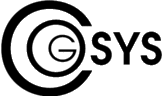

In [182]:
from IPython.display import Image
Image("images/logo.png")

**Second**, you can embed images directly in a Markdown cell as shown below. You can either use markdown syntax or write plain HTML code. Sometimes HTML code is more practical, as you have much finer control over the HTML elements.

1. Markdown syntax:
```
![title](images/logo.png)
```
2. HTML syntax
```
<img src="images/logo.png" style="width: 70px;"/>
```